In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load train and test data
dataset=pd.read_csv('C:\\Neville\\Python\\Session\\Project\\Pharma\\train.csv')
test_dataset=pd.read_csv('C:\\Neville\\Python\\Session\\Project\\Pharma\\test.csv')

In [3]:
#View the train data
dataset.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
#Get an idea of the shape of the train and test data
print(dataset.shape,test_dataset.shape)

(990, 194) (594, 193)


In [5]:
#Check to see if the target variable distribution is balanced
dataset_group=pd.DataFrame(dataset.groupby(['species']).size())
dataset_group.columns=['TotalCount']
#dataset_group[dataset_group['TotalCount']==10]
dataset_group['TotalCount'].unique()

array([10], dtype=int64)

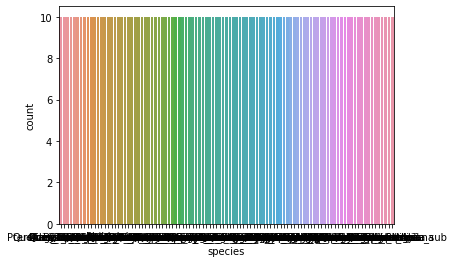

In [6]:
#View it as a bar plot
sns.countplot(data=dataset,x='species')

In [7]:
#Display the list of columns
dataset.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [8]:
#Null value check
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [9]:
#Get the list of categorical variables
for cols in dataset.columns:
    if(dataset[cols].dtypes==object):
        print(cols)

species


In [10]:
#View the list of unique values of the target variable
dataset['species'].unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [11]:
#Create a unique list for the target variable to convert the categorical feature to numerical
target_dataset=pd.DataFrame(dataset['species'].unique())
target_dataset.columns=['species']
target_dataset=target_dataset.sort_values(['species'],ascending=1)

In [12]:
#Create a dictionary with the categorical species name as the key and assign a number to the value
value=1
species_to_id={}
for key in target_dataset['species']:
    species_to_id[key]=value
    value=value+1

In [17]:
#View the created dictionary
species_to_id

{'Acer_Capillipes': 1,
 'Acer_Circinatum': 2,
 'Acer_Mono': 3,
 'Acer_Opalus': 4,
 'Acer_Palmatum': 5,
 'Acer_Pictum': 6,
 'Acer_Platanoids': 7,
 'Acer_Rubrum': 8,
 'Acer_Rufinerve': 9,
 'Acer_Saccharinum': 10,
 'Alnus_Cordata': 11,
 'Alnus_Maximowiczii': 12,
 'Alnus_Rubra': 13,
 'Alnus_Sieboldiana': 14,
 'Alnus_Viridis': 15,
 'Arundinaria_Simonii': 16,
 'Betula_Austrosinensis': 17,
 'Betula_Pendula': 18,
 'Callicarpa_Bodinieri': 19,
 'Castanea_Sativa': 20,
 'Celtis_Koraiensis': 21,
 'Cercis_Siliquastrum': 22,
 'Cornus_Chinensis': 23,
 'Cornus_Controversa': 24,
 'Cornus_Macrophylla': 25,
 'Cotinus_Coggygria': 26,
 'Crataegus_Monogyna': 27,
 'Cytisus_Battandieri': 28,
 'Eucalyptus_Glaucescens': 29,
 'Eucalyptus_Neglecta': 30,
 'Eucalyptus_Urnigera': 31,
 'Fagus_Sylvatica': 32,
 'Ginkgo_Biloba': 33,
 'Ilex_Aquifolium': 34,
 'Ilex_Cornuta': 35,
 'Liquidambar_Styraciflua': 36,
 'Liriodendron_Tulipifera': 37,
 'Lithocarpus_Cleistocarpus': 38,
 'Lithocarpus_Edulis': 39,
 'Magnolia_Heptapeta'

In [21]:
#Convert the target categorical variable to numerical
dataset['species']=dataset['species'].map(species_to_id)

In [18]:
#Drop the ID column in the datasets
dataset.drop(columns=['id'],inplace=True)
test_dataset.drop(columns=['id'],inplace=True)

In [22]:
#Again view the dataset
dataset.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,50,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,66,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,95,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,85,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [23]:
#Display the correlation values for the list of independent variables that has a higher correlation with the target
corr=dataset.corr()
corr.index[abs(corr['species']>0.5)]

Index(['species'], dtype='object')

In [24]:
#Split independent, dependent variables and convert them to arrays
x=dataset.iloc[:,1:].values
y=dataset.iloc[:,:1].values

In [25]:
#Split train and test data 80/20 split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Random Forest
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

#Decision Trees
model_dt=DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)


#Naive Bayes
model_nb=GaussianNB()
model_nb.fit(x_train,y_train)
y_pred_nb=model_nb.predict(x_test)

#SVM
model_svm=SVC(kernel='linear',probability=True)
model_svm.fit(x_train,y_train)
y_pred_svm=model_svm.predict(x_test)

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a

In [27]:
#Check the accuracy of each model
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(y_test,y_pred_rf)
acc_dt=accuracy_score(y_test,y_pred_dt)
acc_nb=accuracy_score(y_test,y_pred_nb)
acc_svm=accuracy_score(y_test,y_pred_svm)
print(acc_rf,acc_dt,acc_nb,acc_svm)

0.8838383838383839 0.6666666666666666 0.6262626262626263 0.8131313131313131


In [28]:
#Get predict_proba to calculate the log loss 
y_pred_rf_prob=model_rf.predict_proba(x_test)
y_pred_dt_prob=model_dt.predict_proba(x_test)
y_pred_nb_prob=model_nb.predict_proba(x_test)
y_pred_svm_prob=model_svm.predict_proba(x_test)

In [29]:
#Calculate the error rate with the help of log loss
from sklearn.metrics import log_loss
rf_logloss=log_loss(y_test,y_pred_rf_prob)
dt_logloss=log_loss(y_test,y_pred_dt_prob)
nb_logloss=log_loss(y_test,y_pred_nb_prob)
svm_logloss=log_loss(y_test,y_pred_svm_prob)
print(rf_logloss,dt_logloss,nb_logloss,svm_logloss)

1.1317816504117801 11.512925464970328 12.908431581936483 4.301986764541863


In [30]:
#Tune the hyperparameters for Random Forest
from sklearn.model_selection import GridSearchCV
params=[{'n_estimators':[50,100,150,200,250,300,350,400]}]
gridsearch=GridSearchCV(estimator=model_rf,param_grid=params,cv=5,n_jobs=1,scoring='accuracy')
gridsearch=gridsearch.fit(x_train,y_train)

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopher

In [31]:
#Get the best score of GridSearchCV
gridsearch.best_score_

0.9835858585858586

In [32]:
#Get the best parameters of GridSearchCV
gridsearch.best_params_

{'n_estimators': 200}

In [33]:
#Rerun the model with the new set of parameters suggested by GridSearchCV
model_rf=RandomForestClassifier(n_estimators=200)
model_rf.fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
#Re-calculate the accuracy score
accuracy_score(y_test,y_pred_rf)

0.9696969696969697

In [35]:
#Check the cross validation score
from sklearn.model_selection import cross_val_score
cv=cross_val_score(model_rf,x,y,cv=10)

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopher

In [36]:
#Print the cross validation results
cv

array([0.97979798, 0.94949495, 1.        , 0.93939394, 0.98989899,
       0.98989899, 0.97979798, 0.97979798, 0.98989899, 1.        ])

In [37]:
#Get the mean and standard deviation of cross validation score
print(cv.mean(),cv.std())

0.9797979797979798 0.019165319152535627


In [38]:
#Again calculate the log loss
y_pred_rf_prob=model_rf.predict_proba(x_test)
log_loss(y_test,y_pred_rf_prob)

0.7676370779289032

In [40]:
#Now predict the target results with the test data
x_test=test_dataset.iloc[:,:].values
y_pred_rf=model_rf.predict(x_test)

In [42]:
#Add the predicted results to the test dataset
test_dataset['species']=y_pred_rf

In [44]:
#Reverse the key value pair that we created with the train data, so that for the test data we can perform the number to categorical conversion for the predicted outcomes
id_to_species={}
for key,values in species_to_id.items():
    id_to_species[values]=key

In [45]:
#View the created dictionary
id_to_species

{1: 'Acer_Capillipes',
 2: 'Acer_Circinatum',
 3: 'Acer_Mono',
 4: 'Acer_Opalus',
 5: 'Acer_Palmatum',
 6: 'Acer_Pictum',
 7: 'Acer_Platanoids',
 8: 'Acer_Rubrum',
 9: 'Acer_Rufinerve',
 10: 'Acer_Saccharinum',
 11: 'Alnus_Cordata',
 12: 'Alnus_Maximowiczii',
 13: 'Alnus_Rubra',
 14: 'Alnus_Sieboldiana',
 15: 'Alnus_Viridis',
 16: 'Arundinaria_Simonii',
 17: 'Betula_Austrosinensis',
 18: 'Betula_Pendula',
 19: 'Callicarpa_Bodinieri',
 20: 'Castanea_Sativa',
 21: 'Celtis_Koraiensis',
 22: 'Cercis_Siliquastrum',
 23: 'Cornus_Chinensis',
 24: 'Cornus_Controversa',
 25: 'Cornus_Macrophylla',
 26: 'Cotinus_Coggygria',
 27: 'Crataegus_Monogyna',
 28: 'Cytisus_Battandieri',
 29: 'Eucalyptus_Glaucescens',
 30: 'Eucalyptus_Neglecta',
 31: 'Eucalyptus_Urnigera',
 32: 'Fagus_Sylvatica',
 33: 'Ginkgo_Biloba',
 34: 'Ilex_Aquifolium',
 35: 'Ilex_Cornuta',
 36: 'Liquidambar_Styraciflua',
 37: 'Liriodendron_Tulipifera',
 38: 'Lithocarpus_Cleistocarpus',
 39: 'Lithocarpus_Edulis',
 40: 'Magnolia_Heptap

In [46]:
#Convert the predicted numerical value back to its categorical value
test_dataset['species']=test_dataset['species'].map(id_to_species)

In [47]:
#View the test dataset with the target results
test_dataset.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64,species
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,...,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711,Quercus_Agrifolia
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,...,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922,Quercus_Afares
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,...,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000,Acer_Circinatum
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,...,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789,Castanea_Sativa
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,...,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812,Alnus_Viridis
